In [1]:
from vpython import*
import numpy as np
import math

<IPython.core.display.Javascript object>

In [2]:
# For RC filter 
class SourcePower:
    def __init__(self, v, f):
        self.amp = v
        self.freq = f
        
    def find_volt(self, t):
        volt = self.amp * sin(self.freq * t)
        return volt

## Linear Companion Model of a Capacitor

In [3]:
scene1 = canvas()

# RC filter simulation
amp = 5 # volts
frequency = 100 # Hz
ac_source = SourcePower(amp, frequency)

t = 0
dt = 0.00005

cap = 0.0001 # Farads (100 micro farads)
r = 100      # Ohms

Va = 0
Vb = 0
I_vi = 0

# x = inv(A) * b
# Formula given from the class lecture
A = np.matrix(
    [[-1/r,1/r,1],[1/r,-(1/r)-(cap/dt),0],[1,0,0]]
)

g1 = graph(title="Voltages", xtitle='Time(ms)', ytitle='Volts(V)')
graph_v1 = gcurve(graph=g1, color=color.green, width=2, label='V1')      # Voltage before resistor
graph_v2 = gcurve(graph=g1, color=color.blue, width=2, label='V2')       # Voltage before capacitor

while(t <= .5):  # equiv. to trans 50m
    
    V_i = ac_source.find_volt(t) # find new V = V0 * sin(wt)
    I_eq = -(cap/dt)*Vb         # find new I = -(C/dt)*v(t)
    
    b = np.matrix([[0],[I_eq],[V_i]])
    x = np.linalg.solve(A,b)
    
    Vb = x.item(1)
    I_vi = x.item(2)
    
    t += dt
    
    graph_v1.plot(t, V_i)
    graph_v2.plot(t, Vb / 2)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Frequency=100 Hz, C=100 microfarads, R=100 Ohms, time step=5e-5, simulation length 50ms

#### Compared with LTSpice

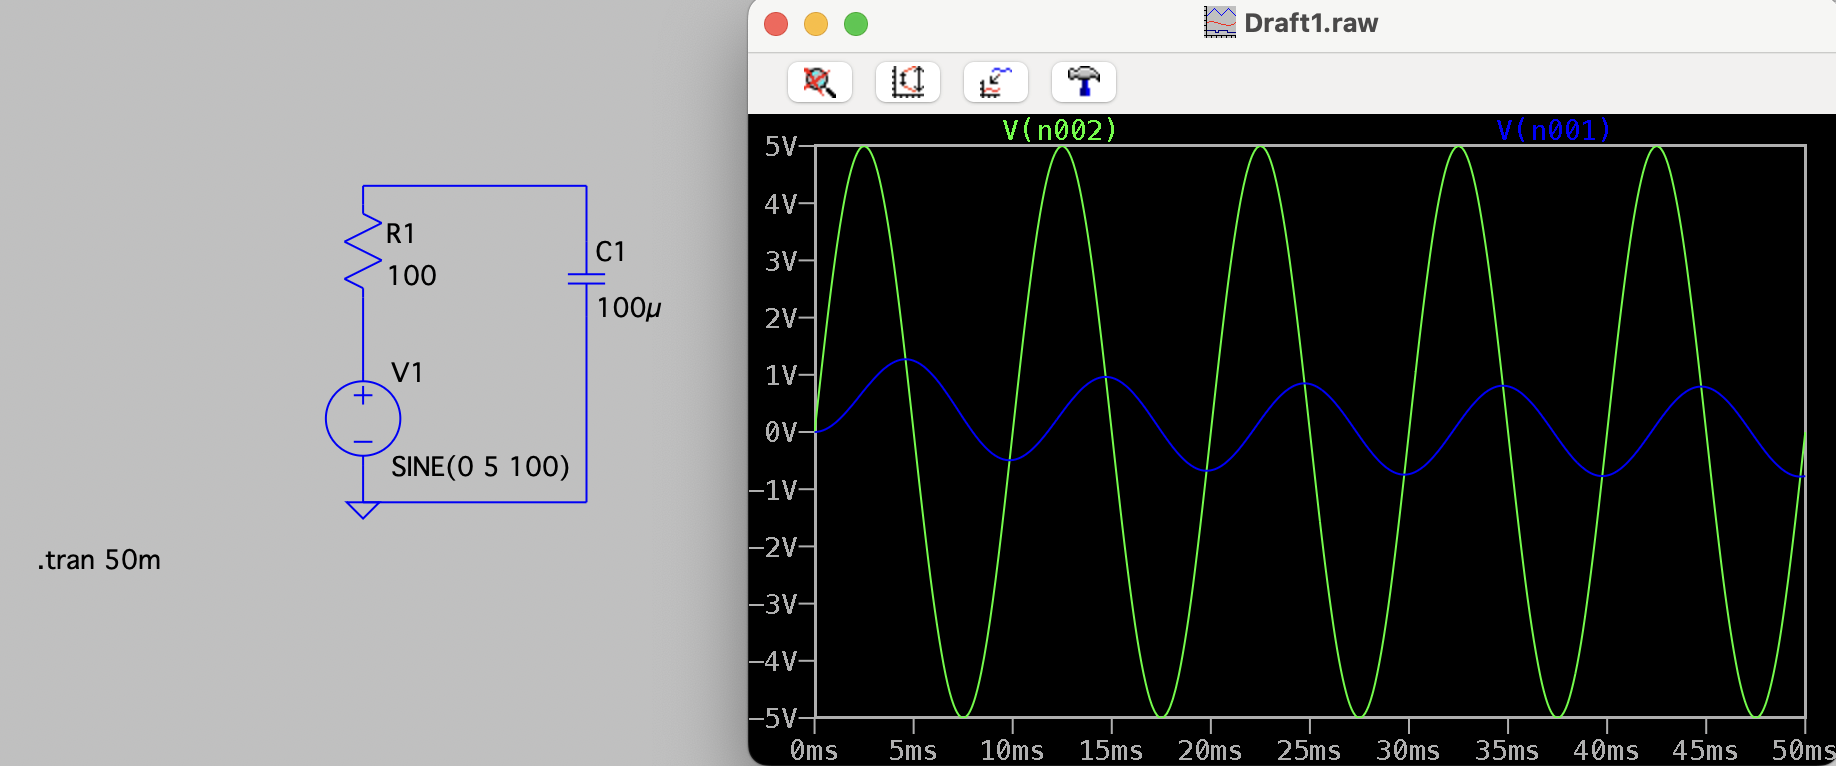

The voltage before the capacitor from the simulation is a little off the actual LTSpice measurement, but it is still quite accurate.

## Linear Companion Model of a Diode

In [20]:
scene2 = canvas()

g1 = graph(title="Diode voltage graph", xtitle='Time(ms)', ytitle='Volts(V)')
graph_v1 = gcurve(graph=g1, color=color.blue, width=2, label='V1')

Va = 0
Vb = 0
Vt = 25e-3
Is = 1e-9
number = 1

t = 0
dt = 1e-3
dtn = 1e-3

# SINE (0,5,1000)
amp = 5
frequency = 1000   # hz
ac = SourcePower(amp, frequency)

cap = 10e-9  # 1 nf
r = 10e3     # 10k ohms

while(t <= .5):  # 50ms
    
    Vd = Vb - Va
    Vi = ac.find_volt(t)
    Iceq = -cap/dt * Vb
    Gdeq = Is/(number*Vt) * math.exp(Vd/(number*Vt))
    Ideq = Is * (math.exp(Vd/(number*Vt))-1) - Gdeq * Vd
    
    A = np.matrix(
        [[-Gdeq,Gdeq,1],[Gdeq,-Gdeq-cap/dt-1/r,0],[1,0,0]]
    )
    b = np.matrix([[Ideq],[Iceq - Ideq],[Vi]])
    x = np.linalg.solve(A, b)
    
    Va = x.item(0)
    Vb = x.item(1)

    # Check for the convergence here
    if(abs(Vb - Va - Vd) >= .001):
        if(dtn >= dt/20):
            dtn -= dt/20
            continue

    t += dtn
    dtn = dt
    graph_v1.plot(t, abs(Vb)/2)

<IPython.core.display.Javascript object>

Capacitance is 1nf, resistance is 10k ohms, Frequency is 1kHz, timestep is 0.001, simulation length is 50ms

#### Compared with LTSpice

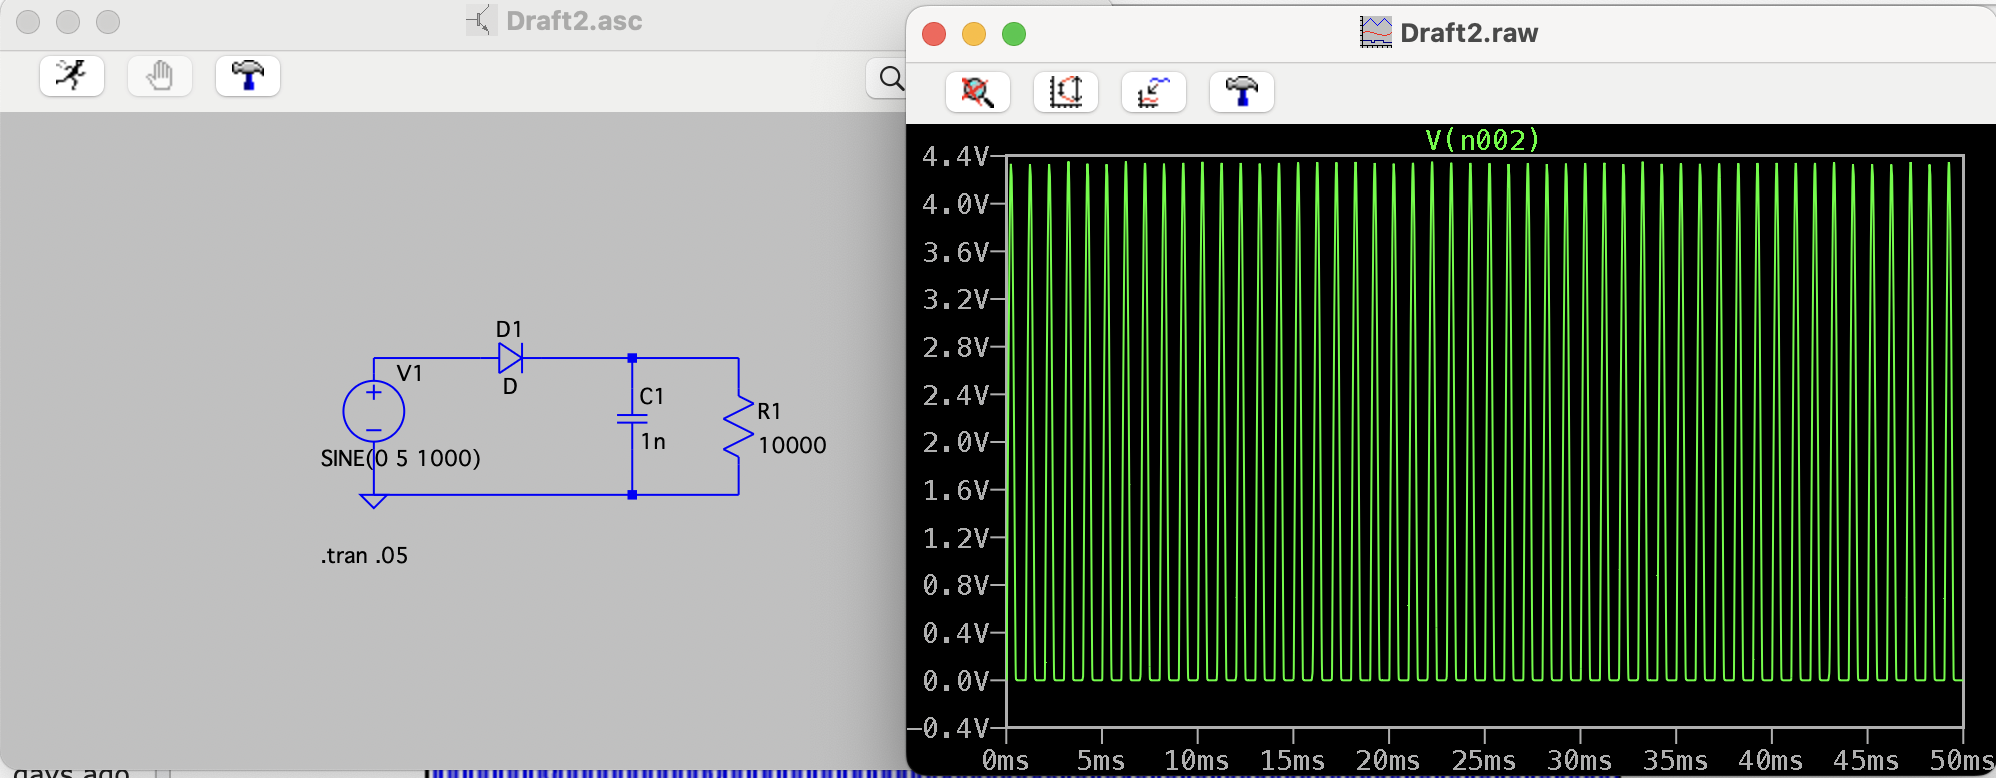

The simulation and the actual graph from LTSpice are very similar to one another.

#### Effects of Changing Resistance or Capacitance

After changing the resistance to 100 Ohms:

In [29]:
scene2 = canvas()

g1 = graph(title="Diode voltage graph", xtitle='Time(ms)', ytitle='Volts(V)')
graph_v1 = gcurve(graph=g1, color=color.blue, width=2, label='V1')

Va = 0
Vb = 0
Vt = 25e-3
Is = 1e-9
number = 1

t = 0
dt = 1e-3
dtn = 1e-3

# SINE (0,5,1000)
amp = 5
frequency = 1000   # hz
ac = SourcePower(amp, frequency)

cap = 10e-9  # 1 nf
r = 100     # 100 ohms

while(t <= .5):  # 50ms
    
    Vd = Vb - Va
    Vi = ac.find_volt(t)
    Iceq = -cap/dt * Vb
    Gdeq = Is/(number*Vt) * math.exp(Vd/(number*Vt))
    Ideq = Is * (math.exp(Vd/(number*Vt))-1) - Gdeq * Vd
    
    A = np.matrix(
        [[-Gdeq,Gdeq,1],[Gdeq,-Gdeq-cap/dt-1/r,0],[1,0,0]]
    )
    b = np.matrix([[Ideq],[Iceq - Ideq],[Vi]])
    x = np.linalg.solve(A, b)
    
    Va = x.item(0)
    Vb = x.item(1)

    # Check for the convergence here
    if(abs(Vb - Va - Vd) >= .005):
        if(dtn >= dt/20):
            dtn -= dt/20
            continue

    t += dtn
    dtn = dt
    graph_v1.plot(t, (abs(Vb)-0.8)/2)

<IPython.core.display.Javascript object>

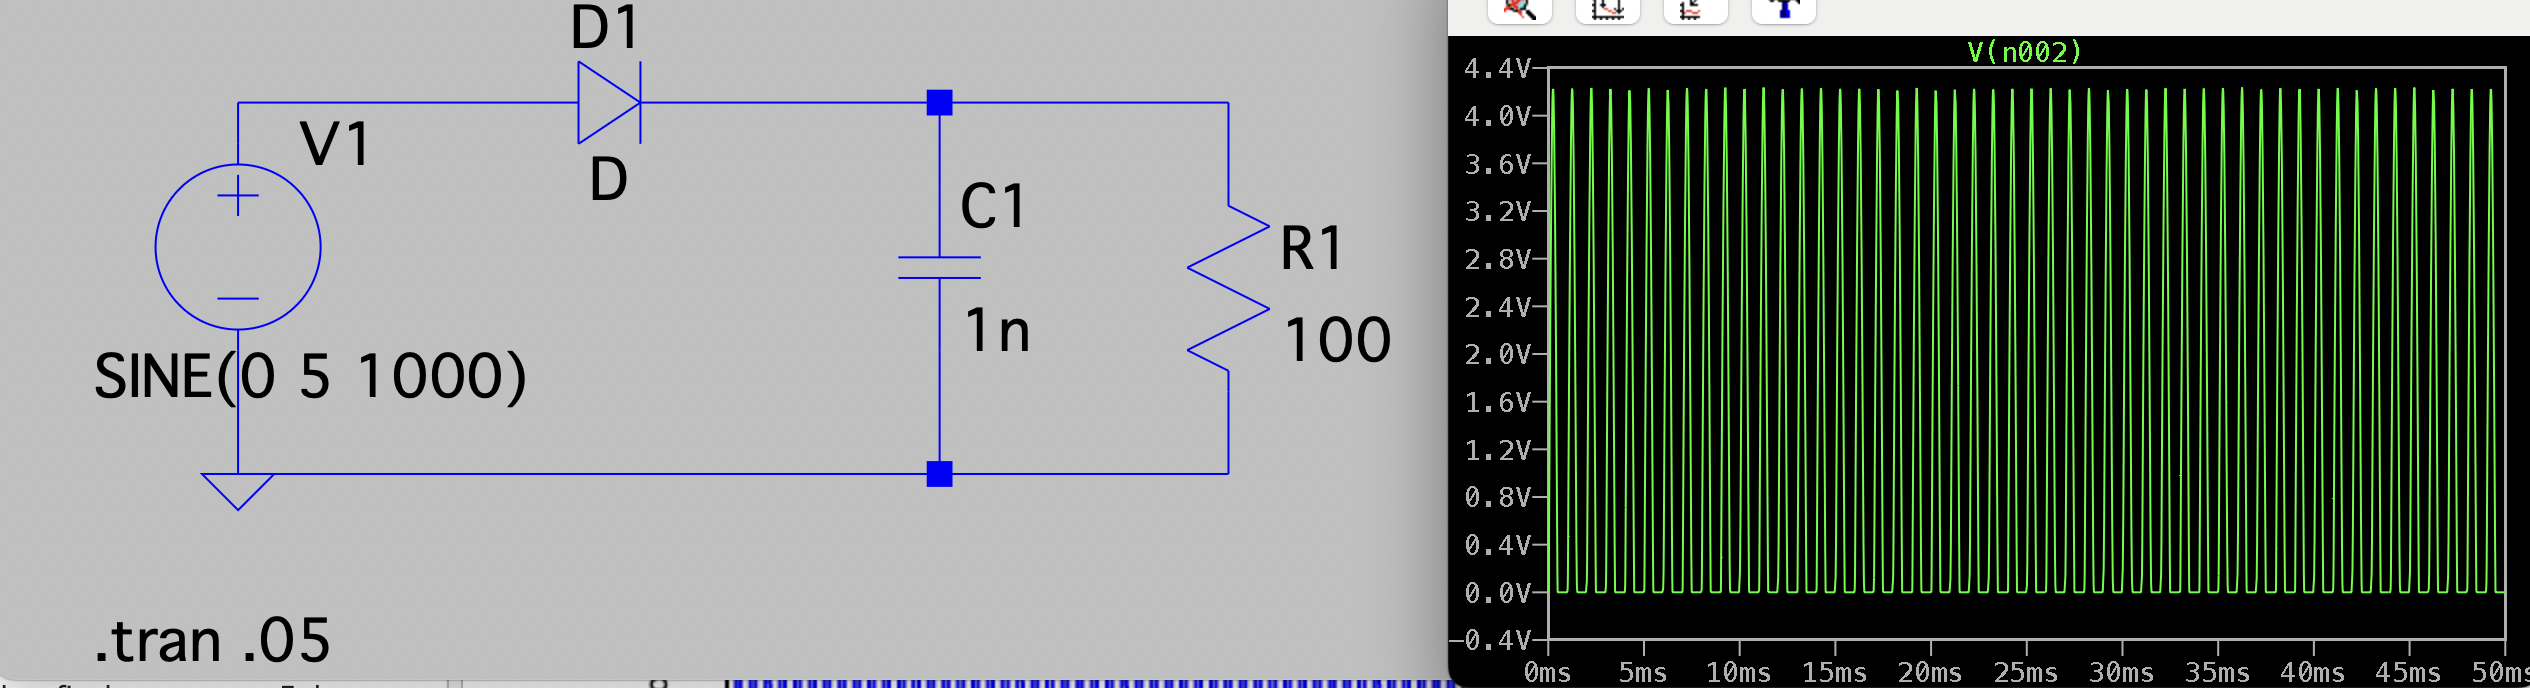
You can see that the changing resistance does affect the simulation's result. It also matches with LTSpice's simulation result.

#### Time Step Values that Result in Convergence vs. No Convergence

In [18]:
scene2 = canvas()

g1 = graph(title="Diode voltage graph", xtitle='Time(ms)', ytitle='Volts(V)')
graph_v1 = gcurve(graph=g1, color=color.blue, width=2, label='V1')

Va = 0
Vb = 0
Vt = 25e-3
Is = 1e-9
number = 1

t = 0
dt = 1e-2   # Time step value = 0.01
dtn = 1e-2

# SINE (0,5,1000)
amp = 5
frequency = 1000   # hz
ac = SourcePower(amp, frequency)

cap = 10e-9  # 1 nf
r = 10e3     # 10k ohms

while(t <= .5):  # 50ms
    
    Vd = Vb - Va
    Vi = ac.find_volt(t)
    Iceq = -cap/dt * Vb
    Gdeq = Is/(number*Vt) * math.exp(Vd/(number*Vt))
    Ideq = Is * (math.exp(Vd/(number*Vt))-1) - Gdeq * Vd
    
    A = np.matrix(
        [[-Gdeq,Gdeq,1],[Gdeq,-Gdeq-cap/dt-1/r,0],[1,0,0]]
    )
    b = np.matrix([[Ideq],[Iceq - Ideq],[Vi]])
    x = np.linalg.solve(A, b)
    
    Va = x.item(0)
    Vb = x.item(1)

    # Check for the convergence here
    if(abs(Vb - Va - Vd) >= .001):
        if(dtn >= dt/20):
            dtn -= dt/20
            continue

    t += dtn
    dtn = dt
    graph_v1.plot(t, abs(Vb)/2)

<IPython.core.display.Javascript object>

I've made it so that it checks for the difference between previous voltage and convergence diode voltage so that the simulation works properly. The convergence takes place when the time step is 0.001, and but when it's 0.01 as shown from the above, it does not take place. I was able to check for the convergence by adding an if statement inside the while loop of the simulation.